<a href="https://colab.research.google.com/github/vishwajeet-hogale/IPO-rep/blob/main/restaurant_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install geopandas
!pip install bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import geopandas 
output_notebook()

     |████████████████████████████████| 1.0MB 4.4MB/s 
     |████████████████████████████████| 15.3MB 251kB/s 
     |████████████████████████████████| 6.5MB 40.7MB/s 


In [ ]:
df = pd.read_csv("Restaurant.csv")

In [ ]:
df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,82207,Mathilde French Bistro,315 05th St,San Francisco,CA,94107,NaN,NaN,NaN,NaN,82207_20171031,10/31/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95229,95229 Outta Here Cheesesteak,24 Willie Mays Pl View Lvl Sect 318,San Francisco,CA,94107,NaN,NaN,NaN,1.415078e+10,95229_20180326,03/26/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3129,Francisca Club,595 Sutter St,San Francisco,CA,94102,37.789014,-122.409967,POINT (-122.409967 37.789014),NaN,3129_20170803,08-03-2017 00:00,NaN,Non-inspection site visit,NaN,NaN,NaN,19.0,19.0,6.0,3.0,21.0
3,99788,ACAI R,1130 Ocean Ave,San Francisco,CA,94112,NaN,NaN,NaN,1.415584e+10,99788_20190530,05/30/2019 12:00:00 AM,78.0,Routine - Unscheduled,99788_20190530_103153,Inadequate dressing rooms or improper storage ...,Low Risk,NaN,NaN,NaN,NaN,NaN
4,88508,McDonald's,5454 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,88508_20190626,06/26/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,121 Spear St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,96202_20190408,04-08-2019 00:00,85.0,Routine - Unscheduled,96202_20190408_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN
53969,65396,Carmelina's Cafe,1855 Folsom St,San Francisco,CA,94103,37.767664,-122.415456,POINT (-122.415456 37.767664),NaN,65396_20170127,01/27/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
53970,64835,Jane,2123 Fillmore St,San Francisco,CA,94115,37.789404,-122.433954,POINT (-122.433954 37.789404),NaN,64835_20161205,12-05-2016 00:00,NaN,Reinspection/Followup,NaN,NaN,NaN,102.0,102.0,4.0,6.0,30.0
53971,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,POINT (-122.420493 37.755282),NaN,1000_20180608,06-08-2018 00:00,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0


In [ ]:
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'Neighborhoods', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods'],
      dtype='object')

In [ ]:
# Visualize the number of distinct businesses
df.business_id.nunique()

6253

In [ ]:
df.isna().sum()

business_id                         0
business_name                       0
business_address                    0
business_city                       0
business_state                      0
business_postal_code             1186
business_latitude               26498
business_longitude              26498
business_location               26513
business_phone_number           36301
inspection_id                       0
inspection_date                     0
inspection_score                14432
inspection_type                     0
violation_id                    13720
violation_description           13720
risk_category                   13720
Neighborhoods                   26538
SF Find Neighborhoods           26538
Current Police Districts        26526
Current Supervisor Districts    26526
Analysis Neighborhoods          26526
dtype: int64

In [ ]:
df.inspection_score.isna().value_counts()

False    39541
True     14432
Name: inspection_score, dtype: int64

In [ ]:
df.groupby(df.risk_category).count()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
risk_category,,,,,,,,,,,,,,,,,,,,,
High Risk,5825,5825,5825,5825,5825,5707,3074,3074,3074,1924,5825,5825,5339,5825,5825,5825,3072,3072,3073,3073,3073
Low Risk,19112,19112,19112,19112,19112,18698,10491,10491,10488,6219,19112,19112,17822,19112,19112,19112,10482,10482,10486,10486,10486
Moderate Risk,15316,15316,15316,15316,15316,15044,8113,8113,8113,4925,15316,15316,14309,15316,15316,15316,8103,8103,8108,8108,8108


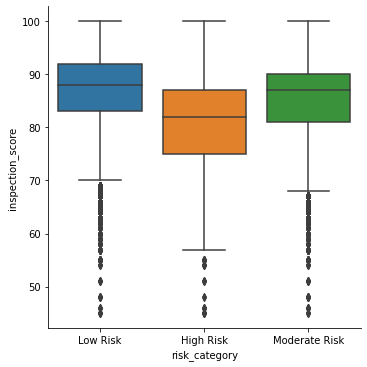

In [ ]:
sns.catplot(x="risk_category", y="inspection_score",kind='box' ,data=df);

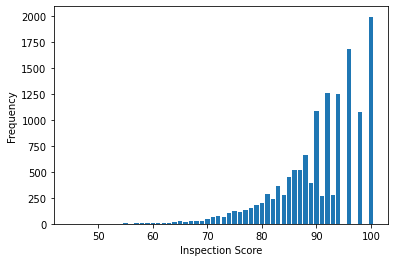

In [ ]:
# Visualize the distribution of inspection scores
# Count unique inspection ID's since each violation is a different row
score_distribution = df.groupby('inspection_score', as_index=False).agg({'inspection_id':'nunique'}).rename({'inspection_id': 'count'}, axis=1)
plt.bar(score_distribution.inspection_score, score_distribution['count'])
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.show();

In [ ]:
# get the newest data on number of restaurants with high risks violations
new_high_risk = df[(df['inspection_date'] == df['inspection_date'].iloc[-1]) & (df['risk_category'] == 'High Risk')]

# number of inspections
print("Number of inspections overall:", df['inspection_id'].nunique())

# newest inpsection with high risks
print("Latest inspections:", df['inspection_date'].iloc[-1], ", Number of restaurants with high risk violations: ", new_high_risk['business_id'].nunique())

Number of inspections overall: 26663
Latest inspections: 07/20/2018 12:00:00 AM , Number of restaurants with high risk violations:  2


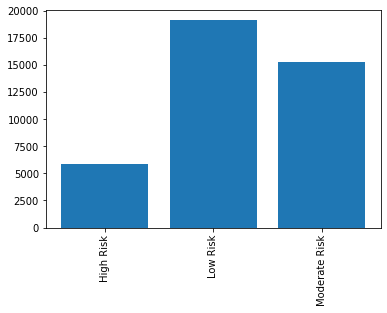

In [ ]:
# Visualize 
rsn = df.groupby("risk_category").size()
lth = range(len(rsn))
plt.bar(lth, rsn)
plt.xticks(lth, rsn.index, rotation=90)
plt.show()


In [ ]:
data = df

In [ ]:
#violation rate
num_isp = len(data["inspection_id"])
num_vio = len(data["violation_id"])-len(data["violation_id"][data["violation_id"].isnull()])
vio_rate = num_vio / num_isp
print("Violation Rate")
print(vio_rate)

Violation Rate
0.7457988253385952


In [ ]:
#average inspection score
avg_score = data["inspection_score"].mean()
print("Average Score")
print(avg_score)

Average Score
86.22166864773273


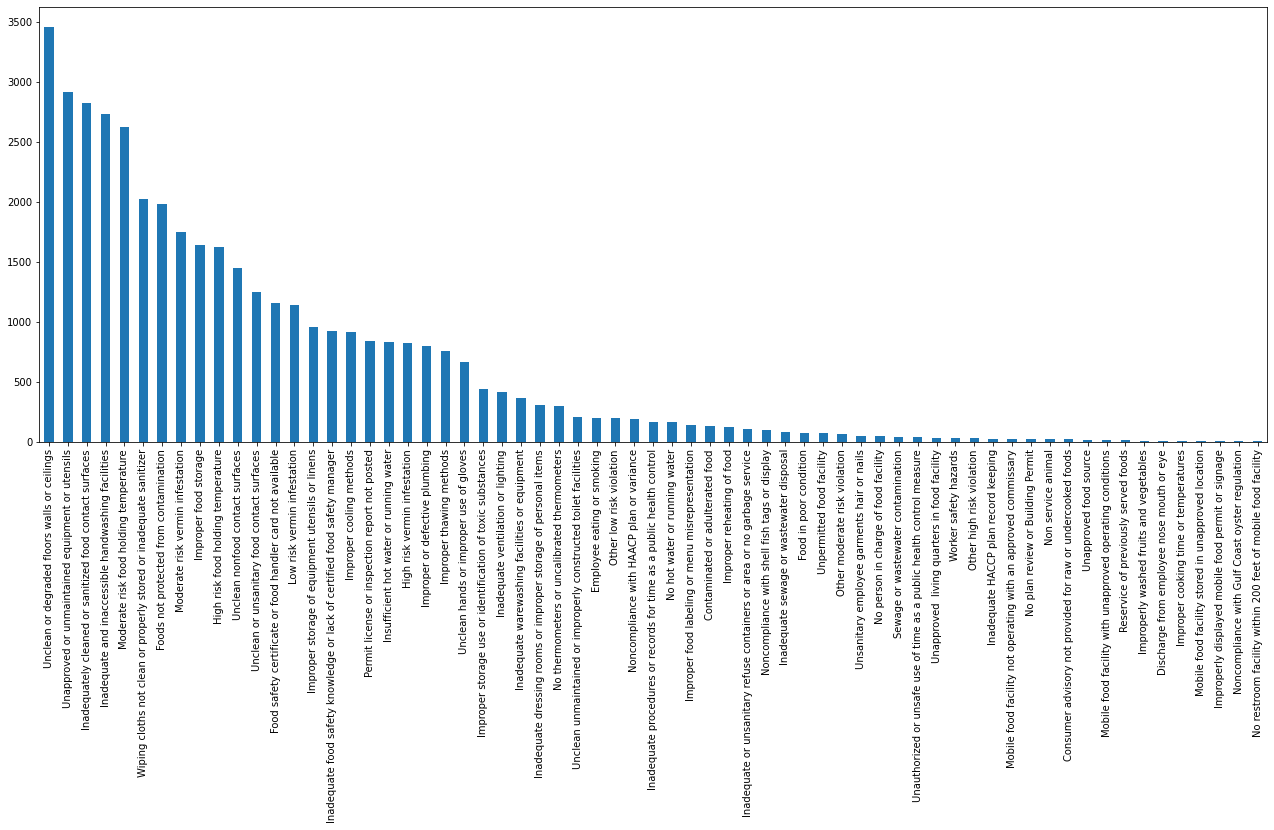

In [ ]:

fig, ax = plt.subplots(1, figsize=(22,8))
df["violation_description"].value_counts().plot(kind='bar', ax=ax)

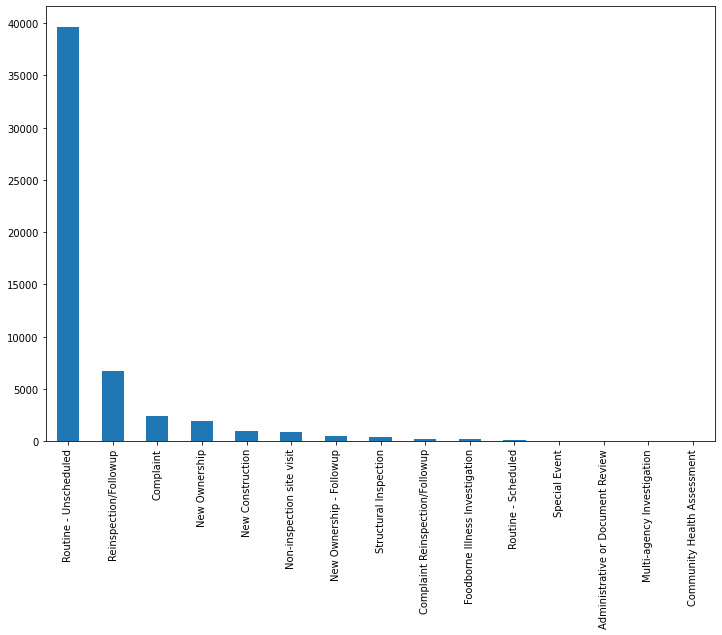

In [ ]:

fig, ax = plt.subplots(1, figsize=(12,8))
df["inspection_type"].value_counts().plot(kind='bar', ax=ax)

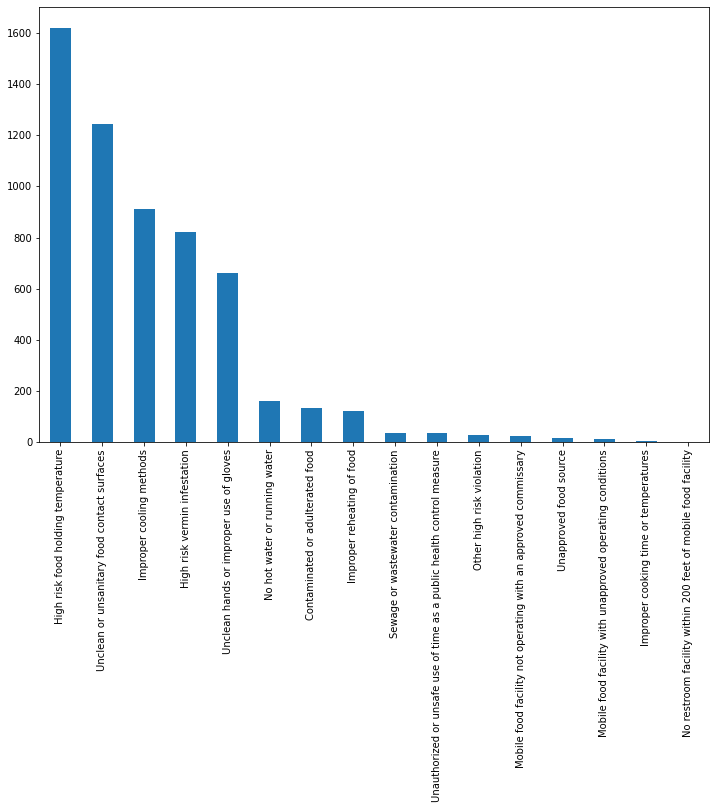

In [ ]:
data_high = data[data["risk_category"] == "High Risk"]
fig, ax = plt.subplots(1, figsize=(12,8))
data_high["violation_description"].value_counts().plot(kind='bar', ax=ax)

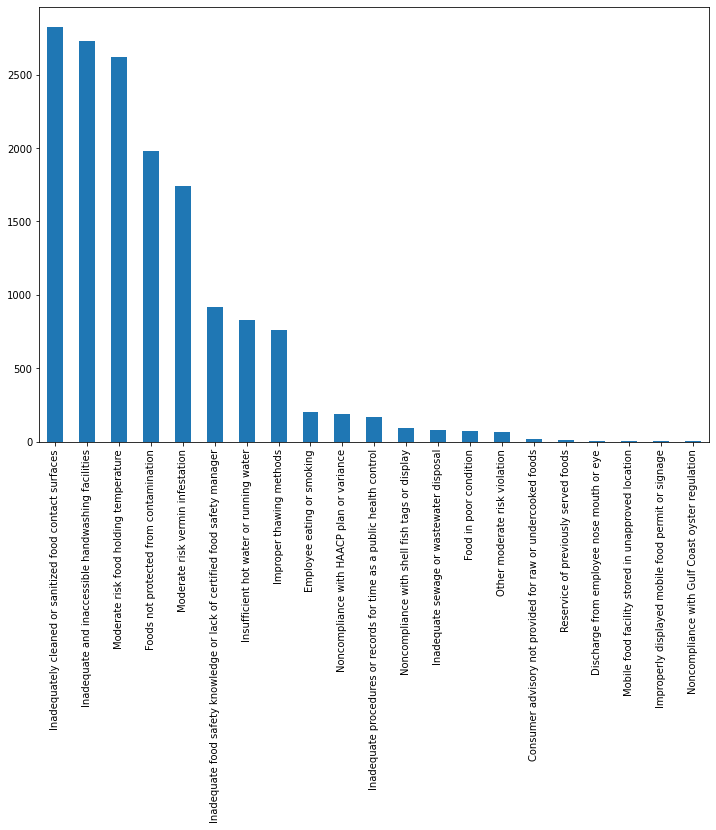

In [ ]:
data_high = data[data["risk_category"] == "Moderate Risk"]
fig, ax = plt.subplots(1, figsize=(12,8))
data_high["violation_description"].value_counts().plot(kind='bar', ax=ax)

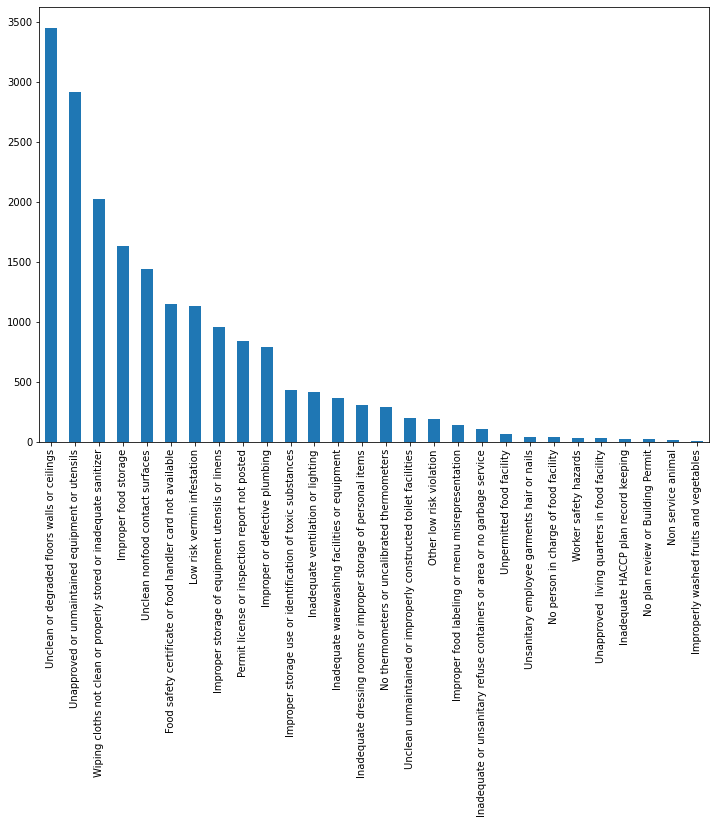

In [ ]:
data_high = data[data["risk_category"] == "Low Risk"]
fig, ax = plt.subplots(1, figsize=(12,8))
data_high["violation_description"].value_counts().plot(kind='bar', ax=ax)

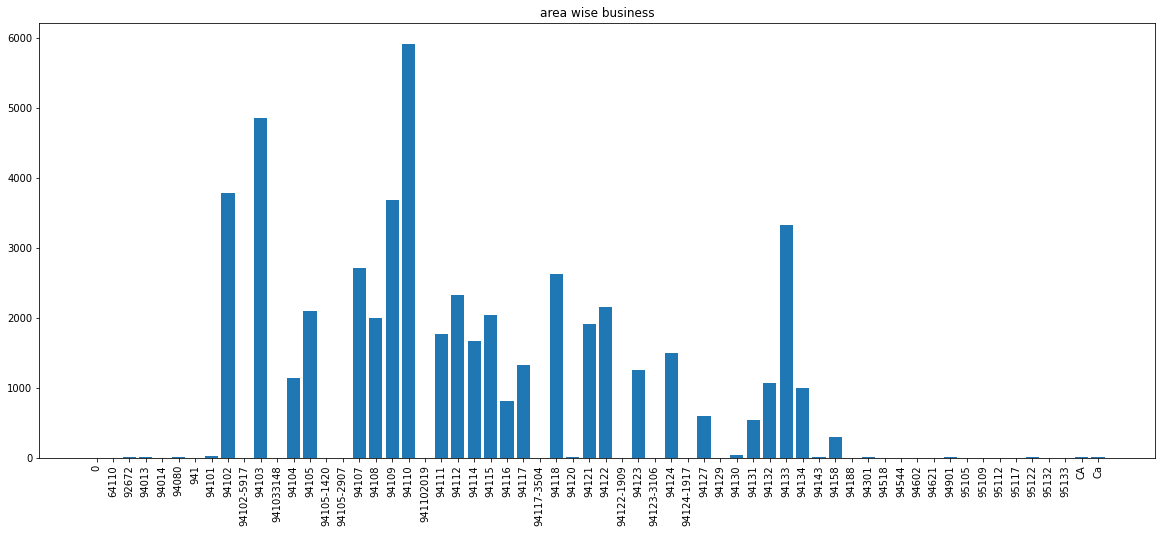

In [ ]:
rsn = df.groupby("business_postal_code").size()
lth = range(len(rsn))
fig, ax = plt.subplots(1, figsize=(20,8))
plt.title("area wise business")
plt.bar(lth, rsn)

plt.xticks(lth, rsn.index, rotation=90)
plt.show()


In [ ]:

df.groupby(df.business_postal_code).count()

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
business_postal_code,,,,,,,,,,,,,,,,,,,,,
0,6,6,6,6,6,0,0,0,6,6,6,4,6,4,4,4,0,0,0,0,0
64110,6,6,6,6,6,0,0,0,6,6,6,4,6,4,4,4,0,0,0,0,0
92672,9,9,9,9,9,9,9,9,9,9,9,8,9,8,8,8,9,9,9,9,9
94013,8,8,8,8,8,8,8,8,0,8,8,8,8,4,4,4,8,8,8,8,8
94014,2,2,2,2,2,0,0,0,2,2,2,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95122,8,8,8,8,8,0,0,0,0,8,8,0,8,6,6,6,0,0,0,0,0
95132,5,5,5,5,5,0,0,0,0,5,5,1,5,4,4,4,0,0,0,0,0
95133,4,4,4,4,4,0,0,0,0,4,4,2,4,2,2,2,0,0,0,0,0


In [ ]:
df.inspection_type.unique()

array(['Reinspection/Followup', 'Routine - Unscheduled',
       'Non-inspection site visit', 'New Ownership', 'New Construction',
       'Complaint', 'New Ownership - Followup', 'Structural Inspection',
       'Foodborne Illness Investigation',
       'Complaint Reinspection/Followup', 'Routine - Scheduled',
       'Special Event', 'Administrative or Document Review',
       'Multi-agency Investigation', 'Community Health Assessment'],
      dtype=object)

In [ ]:
df.groupby(df.inspection_type).count()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
inspection_type,,,,,,,,,,,,,,,,,,,,,
Administrative or Document Review,4,4,4,4,4,4,1,1,1,4,4,4,0,0,0,0,1,1,1,1,1
Community Health Assessment,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
Complaint,2399,2399,2399,2399,2399,2377,1366,1366,1366,848,2399,2399,0,1304,1304,1304,1366,1366,1366,1366,1366
Complaint Reinspection/Followup,232,232,232,232,232,228,134,134,134,113,232,232,0,12,12,12,134,134,134,134,134
Foodborne Illness Investigation,203,203,203,203,203,202,109,109,109,67,203,203,0,127,127,127,109,109,109,109,109
Multi-agency Investigation,3,3,3,3,3,3,1,1,1,0,3,3,0,0,0,0,1,1,1,1,1
New Construction,999,999,999,999,999,976,144,144,144,269,999,999,0,12,12,12,144,144,144,144,144
New Ownership,1914,1914,1914,1914,1914,1877,5,5,5,717,1914,1914,0,486,486,486,5,5,5,5,5
New Ownership - Followup,531,531,531,531,531,529,6,6,6,220,531,531,0,66,66,66,6,6,6,6,6


In [ ]:
df.inspection_type.value_counts()

Routine - Unscheduled                39638
Reinspection/Followup                 6718
Complaint                             2399
New Ownership                         1914
New Construction                       999
Non-inspection site visit              847
New Ownership - Followup               531
Structural Inspection                  402
Complaint Reinspection/Followup        232
Foodborne Illness Investigation        203
Routine - Scheduled                     74
Special Event                            8
Administrative or Document Review        4
Multi-agency Investigation               3
Community Health Assessment              1
Name: inspection_type, dtype: int64

In [ ]:
df.inspection_score.max()

100.0

In [ ]:
df1=df.loc[df['inspection_score'] == 100.0]
df1

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
1,95229,95229 Outta Here Cheesesteak,24 Willie Mays Pl View Lvl Sect 318,San Francisco,CA,94107,NaN,NaN,NaN,1.415078e+10,95229_20180326,03/26/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,86768,Hill Top General Store,1398 Leavenworth St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,86768_20171013,10/13/2017 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,76574,Bebebar Juice & Sandwich,3809 18th St,San Francisco,CA,94114,NaN,NaN,NaN,1.415521e+10,76574_20161109,11-09-2016 00:00,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,5528,AT&T - Juma Cart 1 - Ice Cream,24 WILLIE MAYS PLAZA,San Francisco,CA,94107,NaN,NaN,NaN,1.415525e+10,5528_20180911,09-11-2018 00:00,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,97804,BICYCLE BANH MI INC.,1324 Fitzgerald Ave,San Francisco,CA,94124,NaN,NaN,NaN,1.415731e+10,97804_20181003,10-03-2018 00:00,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53898,94943,94943 Hearth Table,24 Willie Mays Pl Lower Cent Fd Rm 1144,San Francisco,CA,94107,NaN,NaN,NaN,NaN,94943_20190412,04-12-2019 00:00,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53926,10030,Marshall Elementary School,1575 15th St,San Francisco,CA,94103,37.766864,-122.419014,POINT (-122.419014 37.766864),1.415525e+10,10030_20181016,10/16/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
53932,19170,Vino Rosso,629 Cortland Ave,San Francisco,CA,94110,37.739041,-122.415636,POINT (-122.415636 37.739041),1.415564e+10,19170_20180314,03/14/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,83.0,83.0,9.0,2.0,2.0
53958,91078,BlueStar Refreshment Services @ Uber Technolog...,"555 Market St, Floors 15, 16, 17",San Francisco,CA,94105,NaN,NaN,NaN,NaN,91078_20171220,12/20/2017 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.inspection_type.value_counts()
#inspection score is highest for mainly the Routine_unscheduled

Routine - Unscheduled    2002
Name: inspection_type, dtype: int64

In [ ]:
df1.risk_category.value_counts()

Low Risk         9
Moderate Risk    4
High Risk        2
Name: risk_category, dtype: int64

In [ ]:
df["SF Find Neighborhoods"].max()

117.0

In [ ]:
df.loc[df['SF Find Neighborhoods'] == 117.0]

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
987,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20180222,02/22/2018 12:00:00 AM,84.0,Routine - Unscheduled,17723_20180222_103142,Unclean nonfood contact surfaces,Low Risk,117.0,117.0,9.0,8.0,41.0
2904,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20181212,12-12-2018 00:00,69.0,Routine - Unscheduled,17723_20181212_103142,Unclean nonfood contact surfaces,Low Risk,117.0,117.0,9.0,8.0,41.0
3576,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20181212,12-12-2018 00:00,69.0,Routine - Unscheduled,17723_20181212_103109,Unclean or unsanitary food contact surfaces,High Risk,117.0,117.0,9.0,8.0,41.0
4335,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20180222,02/22/2018 12:00:00 AM,84.0,Routine - Unscheduled,17723_20180222_103133,Foods not protected from contamination,Moderate Risk,117.0,117.0,9.0,8.0,41.0
5306,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20180222,02/22/2018 12:00:00 AM,84.0,Routine - Unscheduled,17723_20180222_103144,Unapproved or unmaintained equipment or utensils,Low Risk,117.0,117.0,9.0,8.0,41.0
7404,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20181212,12-12-2018 00:00,69.0,Routine - Unscheduled,17723_20181212_103157,Food safety certificate or food handler card n...,Low Risk,117.0,117.0,9.0,8.0,41.0
7865,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20181212,12-12-2018 00:00,69.0,Routine - Unscheduled,17723_20181212_103154,Unclean or degraded floors walls or ceilings,Low Risk,117.0,117.0,9.0,8.0,41.0
10744,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20180222,02/22/2018 12:00:00 AM,84.0,Routine - Unscheduled,17723_20180222_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,117.0,117.0,9.0,8.0,41.0
11651,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20181212,12-12-2018 00:00,69.0,Routine - Unscheduled,17723_20181212_103145,Improper storage of equipment utensils or linens,Low Risk,117.0,117.0,9.0,8.0,41.0
13183,17723,Sushi Suki Restaurant,360 C West Portal Ave,San Francisco,CA,94127,37.738857,-122.457584,POINT (-122.457584 37.738857),NaN,17723_20181212,12-12-2018 00:00,69.0,Routine - Unscheduled,17723_20181212_103133,Foods not protected from contamination,Moderate Risk,117.0,117.0,9.0,8.0,41.0


In [ ]:
df.Neighborhoods.value_counts()

53.0     3060
32.0     2380
108.0    1542
104.0    1196
5.0      1099
         ... 
113.0       7
36.0        7
47.0        6
114.0       5
45.0        3
Name: Neighborhoods, Length: 110, dtype: int64